In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

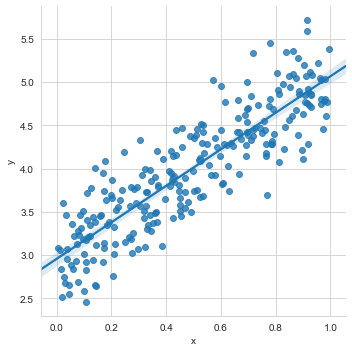

In [48]:
m = 2 # slope
c = 3 # intercept
x = np.random.rand(256)

noise = np.random.normal(0,1/3,256)

y = x*m+c+noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x='x', y='y', data=df)

In [49]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [50]:
x_train = x.reshape(-1,1).astype('float32')
y_train = y.reshape(-1,1).astype('float32')

class LinearRegressionModel(nn.Module):
    
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out
#Column
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

#input_dim,output_dim(1,1)
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()
[w,b] = model.parameters()

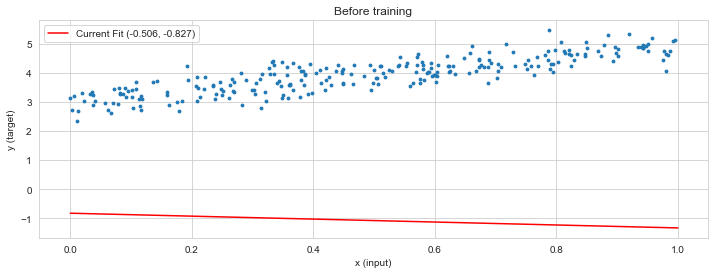

In [36]:
def get_param_values():
     return w.data[0][0], b.data[0]
def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    w1 = w.data[0][0].numpy()
    b1 = b.data[0].numpy()
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label='Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
plot_current_fit('Before training')

In [60]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
losses = []
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred,y_train)
    if epoch%50==0:
        print('epoch',epoch, 'loss', loss.item())
    losses.append(loss.item())
    # Calculate gradient
    optimizer.zero_grad()
    # Backpropagate
    loss.backward()
    # Update the parameters
    optimizer.step()

epoch 0 loss 0.11576862633228302
epoch 50 loss 0.115768663585186
epoch 100 loss 0.11576861888170242
epoch 150 loss 0.11576861888170242
epoch 200 loss 0.11576862633228302
epoch 250 loss 0.11576861888170242
epoch 300 loss 0.11576862633228302
epoch 350 loss 0.11576862633228302
epoch 400 loss 0.11576862633228302
epoch 450 loss 0.11576862633228302


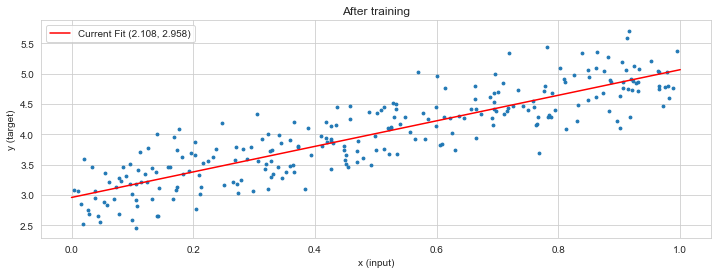

In [62]:
def get_param_values():
     return w.data[0][0], b.data[0]
def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    w1 = w.data[0][0].numpy()
    b1 = b.data[0].numpy()
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label='Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
plot_current_fit('After training')